# Table of Contents

## 01. Library and Data Import
## 02. Picking a theme (style and palette)
## 03. Top 20 stations bar chart
## 04. Bike Trips & Temperatures Line Chart
## 05. Box Plot
## 06. FacetGrid Plot
        Trips by Time of Day (Weekday vs. Weekend)

### 01. Library and Data Import

In [1]:
# Import necessary libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computing

# Import visualization libraries
import matplotlib.pyplot as plt  # Data visualization with Matplotlib
import seaborn as sns  # Statistical data visualization with Seaborn

# Import datetime module for handling date and time data
from datetime import datetime as dt

In [2]:
# Define the file path for the 'newyork_data_cleaned_v3.pkl' dataset
file_path = r"C:\Users\HP\Citi_Bike_Dashboard\02 Data\Prepared Data\newyork_data_cleaned_v3.pkl"

# Load the dataset into a Pandas DataFrame
df = pd.read_pickle(file_path)

# Display the first few rows to confirm successful loading (optional)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,trip_duration
date,,,,,,,,,,,,,,,,
2022-01-01,88237B34DAFDB069,electric_bike,2022-01-01 00:00:13.532,2022-01-01 00:30:28.482,Broadway & W 160 St,8157.06,Broadway & W 160 St,8157.06,40.835773,-73.943398,40.835773,-73.943398,casual,11.6,20198,30.249167
2022-01-01,4545E384F601A7E9,classic_bike,2022-01-01 00:00:32.146,2022-01-01 00:02:15.504,Forsyth St & Broome St,5453.05,Forsyth St & Broome St,5453.05,40.718941,-73.992661,40.718941,-73.992661,member,11.6,20198,1.722633
2022-01-01,7CE9B56332A37463,electric_bike,2022-01-01 00:00:42.801,2022-01-01 00:11:38.969,Myrtle Ave & Marcy Ave,4707.03,Willoughby St & Fleet St,4628.05,40.695396,-73.949547,40.691967,-73.981300,member,11.6,20198,10.936133
2022-01-01,AEAF2FFEBB00845B,electric_bike,2022-01-01 00:00:50.604,2022-01-01 02:39:37.688,W 15 St & 7 Ave,6030.06,W 33 St & 7 Ave,6407.07,40.739357,-73.999321,40.750198,-73.990929,casual,11.6,20198,158.784733
2022-01-01,9B01074C8CABA851,classic_bike,2022-01-01 00:01:05.031,2022-01-01 00:11:53.032,W 15 St & 7 Ave,6030.06,W 36 St & 7 Ave,6483.06,40.739357,-73.999321,40.752148,-73.989540,member,11.6,20198,10.800017


In [3]:
df.shape

(29767925, 16)

In [4]:
# Resetting the index

df = df.reset_index().rename(columns={"index": "date"})

In [5]:
df.head()

,date,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,trip_duration
0,2022-01-01,88237B34DAFDB069,electric_bike,2022-01-01 00:00:13.532,2022-01-01 00:30:28.482,Broadway & W 160 St,8157.06,Broadway & W 160 St,8157.06,40.835773,-73.943398,40.835773,-73.943398,casual,11.6,20198,30.249167
1,2022-01-01,4545E384F601A7E9,classic_bike,2022-01-01 00:00:32.146,2022-01-01 00:02:15.504,Forsyth St & Broome St,5453.05,Forsyth St & Broome St,5453.05,40.718941,-73.992661,40.718941,-73.992661,member,11.6,20198,1.722633
2,2022-01-01,7CE9B56332A37463,electric_bike,2022-01-01 00:00:42.801,2022-01-01 00:11:38.969,Myrtle Ave & Marcy Ave,4707.03,Willoughby St & Fleet St,4628.05,40.695396,-73.949547,40.691967,-73.981300,member,11.6,20198,10.936133
3,2022-01-01,AEAF2FFEBB00845B,electric_bike,2022-01-01 00:00:50.604,2022-01-01 02:39:37.688,W 15 St & 7 Ave,6030.06,W 33 St & 7 Ave,6407.07,40.739357,-73.999321,40.750198,-73.990929,casual,11.6,20198,158.784733
4,2022-01-01,9B01074C8CABA851,classic_bike,2022-01-01 00:01:05.031,2022-01-01 00:11:53.032,W 15 St & 7 Ave,6030.06,W 36 St & 7 Ave,6483.06,40.739357,-73.999321,40.752148,-73.989540,member,11.6,20198,10.800017


### 02. Picking a theme (style and palette)

In [6]:
# Set the style and color palette

sns.set_style("darkgrid")  # Using for readability and a modern look
sns.set_palette("coolwarm_r")  # Using for contrast and intuitive data representation

**Style**
- I am using the `darkgrid` style because it is a modern and clean look.
- The gridlines improve readability, especially for bar charts and line plots.
---
**Palette**
- I am using the `coolwarm_r` palette because it highlights high and low values clearly.
- It is a palette that works well for time-based trends and continuous data.

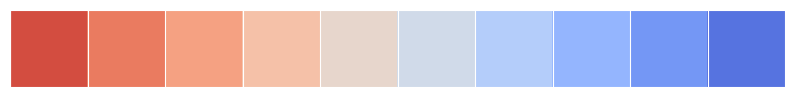

In [7]:
# Preview the color palette
sns.palplot(sns.color_palette("coolwarm_r", n_colors=10))
plt.show()

### 03. Top 20 stations bar chart

In [9]:
# Create a new column 'value' and set it to 1 for each trip (acts as a counter)

df['value'] = 1

In [10]:
# Group by 'start_station_name' and count occurrences (total trips from each station)

df_t = df.groupby('start_station_name')['value'].count().reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_13344\3443792607.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_t = df.groupby('start_station_name')['value'].count().reset_index()


In [11]:
# Select the top 20 most frequently used start stations based on trip count

top20 = df_t.nlargest(20, 'value')  # Selects the 20 highest values in the 'value' column

In [12]:
top20

,start_station_name,value
1587,W 21 St & 6 Ave,128822
1718,West St & Chambers St,123045
495,Broadway & W 58 St,114040
286,6 Ave & W 33 St,106236
8,1 Ave & E 68 St,104685
461,Broadway & E 14 St,98656
485,Broadway & W 25 St,98237
1511,University Pl & E 14 St,96938
463,Broadway & E 21 St,95532
1603,W 31 St & 7 Ave,94030


In [13]:
# Cleaning the station names
top20['start_station_name'] = top20['start_station_name'].str.strip()  # Remove leading/trailing spaces
top20['start_station_name'] = top20['start_station_name'].str.replace("\t", "", regex=True)  # Remove tabs

C:\Users\HP\AppData\Local\Temp\ipykernel_11960\4232548805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top20, x='value', y='start_station_name', palette="coolwarm_r", orient="h")


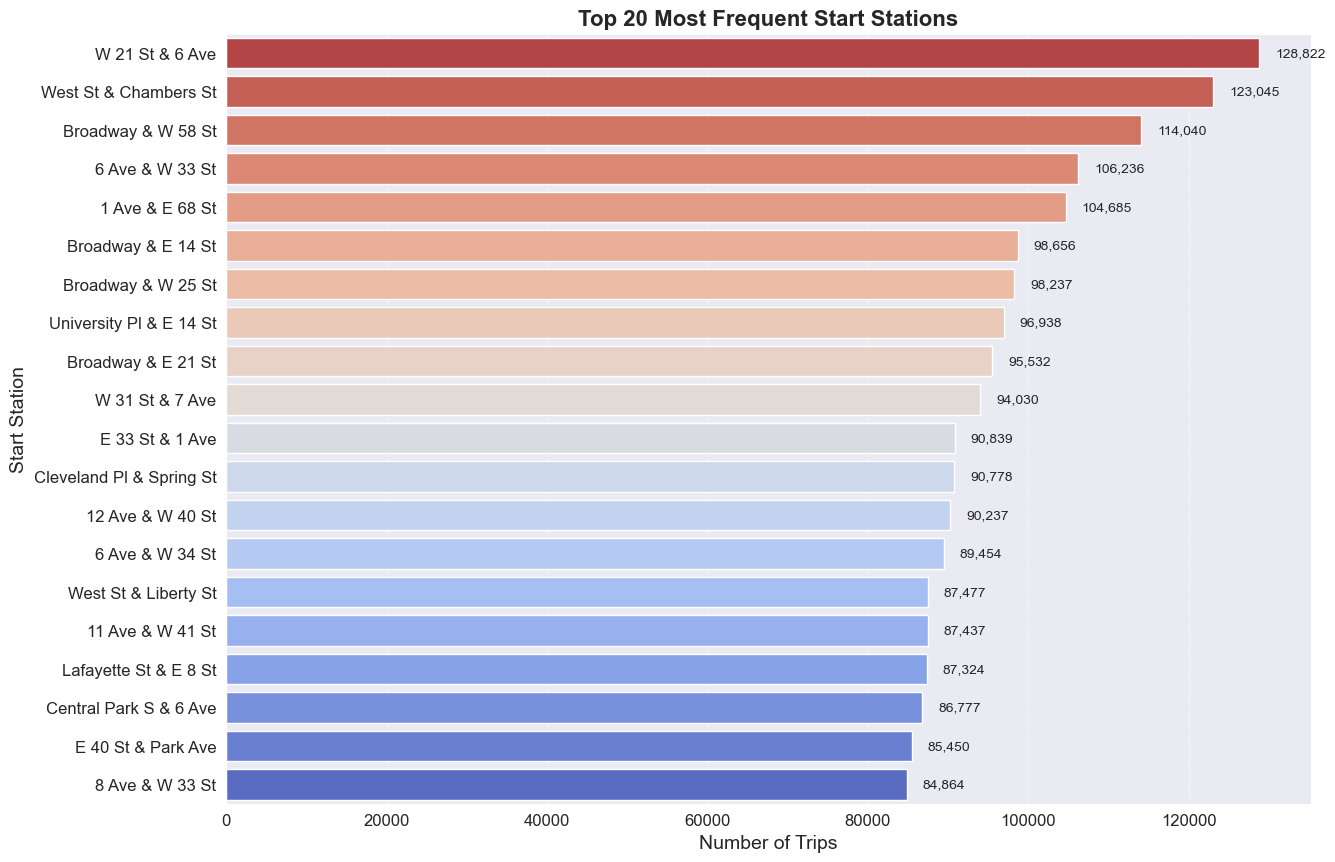

In [13]:
# Set figure size for better readability
plt.figure(figsize=(14, 10))

# Create a horizontal bar chart
ax = sns.barplot(data=top20, x='value', y='start_station_name', palette="coolwarm_r", orient="h")

# Add a title and labels
plt.title("Top 20 Most Frequent Start Stations", fontsize=16, fontweight="bold")
plt.xlabel("Number of Trips", fontsize=14)
plt.ylabel("Start Station", fontsize=14)

# Improve font visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Add text labels with exact values
for index, value in enumerate(top20["value"]):
    ax.text(value + 2000, index, f"{value:,}", fontsize=10, verticalalignment="center")

# Define file path to save the visualization
save_path = r"C:\Users\HP\Citi_Bike_Dashboard\04 Analysis\Visualizations\top20_start_stations.png"

# Save the figure (adjust dpi for better resolution)
plt.savefig(save_path, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

#### **Code Explanation**
1. **Horizontal Bar Chart**
   - A horizontal bar chart was utilized because the station names are long and ensures better readability compared to a vertical bar chart.
3. **Use of `coolwarm_r` palette**
   - The `coolwarm_r` color gradient was used to highlight variation in trip frequency making it easier to differentiate stations with high and low usage.
3. **Figure Size**
   - `figsize=(14,10)` ensures that all station names fit within the chart, improving readability.
5. **Adding Exact Values**
   - The values listed to the right of each bar display the exact trip counts for each station, providing immediate clarity for each station.
5. **Custom labels, titles, & legend**
   - These provide a clear description so the audience understands what the chart represents at a glance.

## 04. Bike Trips & Temperatures Line Chart

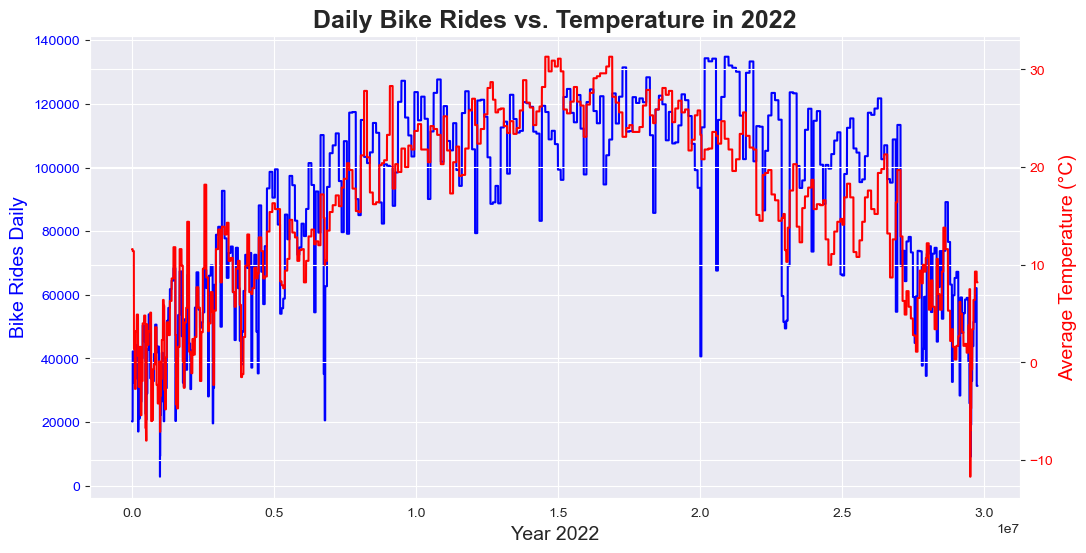

In [14]:
# Create figure and axis with an appropriate size for visibility
fig, ax = plt.subplots(figsize=(12, 6))  # Slightly wider for better spacing

# Plot bike rides per day (Primary Y-axis, Blue Line)
sns.lineplot(data=df['bike_rides_daily'], color="blue", ax=ax)  # Use Seaborn's lineplot

# Set labels for Primary Y-axis
ax.set_xlabel("Year 2022", fontsize=14)  # X-axis label
ax.set_ylabel("Bike Rides Daily", color="blue", fontsize=14)  # Y-axis label
ax.tick_params(axis='y', labelcolor="blue")  # Ensures y-ticks match the axis color

# Create a secondary Y-axis for average temperature
ax2 = ax.twinx()  # Overlay a second Y-axis on the same figure
sns.lineplot(data=df['avgTemp'], color="red", ax=ax2)  # Plot temperature data (Red Line)

# Set labels for Secondary Y-axis
ax2.set_ylabel("Average Temperature (°C)", color="red", fontsize=14)
ax2.tick_params(axis='y', labelcolor="red")  # Ensures y-ticks match the axis color

# Add a title to the plot
plt.title("Daily Bike Rides vs. Temperature in 2022", fontsize=18, fontweight="bold")

# Define the save path for the visualization
save_path = r"C:\Users\HP\Citi_Bike_Dashboard\04 Analysis\Visualizations\bike_rides_vs_temp_2022.png"

# Save the figure with high resolution
plt.savefig(save_path, dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

#### **Code Explanation**
1. **Line Chart for Time-Series Data**
   - Line charts are the best choice for visualizing daily trends in bike rides and temperature over time.
   - It helps identify patterns, peaks, and seasonal trends.
2. **Dual Y-axis for comparing two variables**
   - This allows both datasets to be plotted on the same timeline, making it easier to see correlations.
3. **Color Differentiation**
   - Daily bikes rides (blue) and average temperature (red) were used to differentiate the two datasets in a clear manner.
4. **Custom labels, titles, & legend**
   - These provide a clear description so the audience understands what the chart represents at a glance.

### 05. Box Plot

In [14]:
df.head()

,date,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,trip_duration,value
0,2022-01-01,88237B34DAFDB069,electric_bike,2022-01-01 00:00:13.532,2022-01-01 00:30:28.482,Broadway & W 160 St,8157.06,Broadway & W 160 St,8157.06,40.835773,-73.943398,40.835773,-73.943398,casual,11.6,20198,30.249167,1
1,2022-01-01,4545E384F601A7E9,classic_bike,2022-01-01 00:00:32.146,2022-01-01 00:02:15.504,Forsyth St & Broome St,5453.05,Forsyth St & Broome St,5453.05,40.718941,-73.992661,40.718941,-73.992661,member,11.6,20198,1.722633,1
2,2022-01-01,7CE9B56332A37463,electric_bike,2022-01-01 00:00:42.801,2022-01-01 00:11:38.969,Myrtle Ave & Marcy Ave,4707.03,Willoughby St & Fleet St,4628.05,40.695396,-73.949547,40.691967,-73.981300,member,11.6,20198,10.936133,1
3,2022-01-01,AEAF2FFEBB00845B,electric_bike,2022-01-01 00:00:50.604,2022-01-01 02:39:37.688,W 15 St & 7 Ave,6030.06,W 33 St & 7 Ave,6407.07,40.739357,-73.999321,40.750198,-73.990929,casual,11.6,20198,158.784733,1
4,2022-01-01,9B01074C8CABA851,classic_bike,2022-01-01 00:01:05.031,2022-01-01 00:11:53.032,W 15 St & 7 Ave,6030.06,W 36 St & 7 Ave,6483.06,40.739357,-73.999321,40.752148,-73.989540,member,11.6,20198,10.800017,1


In [15]:
# Get summary statistics

df['trip_duration'].describe().apply(lambda x: format(x, 'f'))

count    29767925.000000
mean           16.017994
std           247.319986
min             1.000233
25%             5.788833
50%            10.139133
75%            17.920800
max        404481.005867
Name: trip_duration, dtype: object

In [8]:
# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR (Interquartile Range)
Q1 = df["trip_duration"].quantile(0.25)
Q3 = df["trip_duration"].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range (spread of the middle 50% of data)

In [9]:
# Define lower and upper bounds using a stricter threshold (3.0 * IQR)
lower_bound = Q1 - 3.0 * IQR
upper_bound = min(Q3 + 3.0 * IQR, 120)  # Cap outliers at 120 minutes

In [10]:
# Filter data to exclude extreme outliers
df_filtered = df[(df["trip_duration"] >= lower_bound) & (df["trip_duration"] <= upper_bound)]

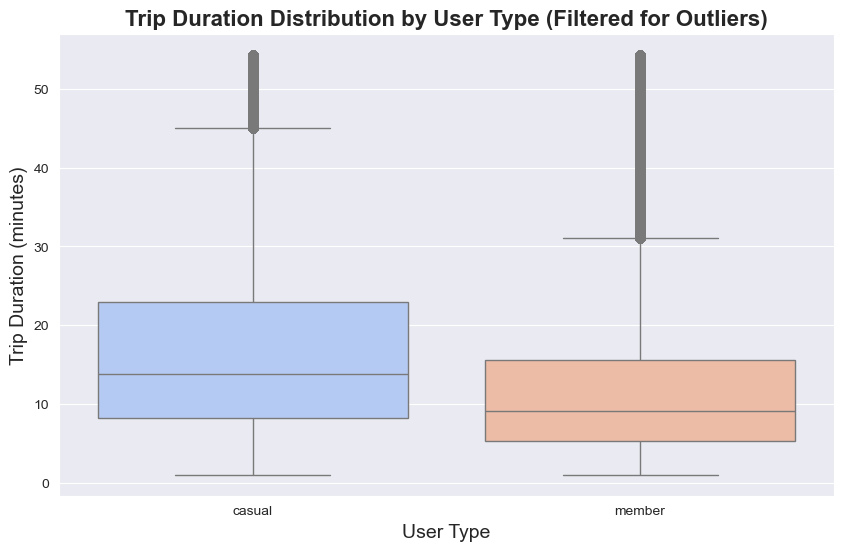

In [20]:
# Set figure size for better readability
plt.figure(figsize=(10, 6))

# Create a box plot with proper hue assignment
ax = sns.boxplot(data=df_filtered, x="member_casual", y="trip_duration", hue="member_casual", palette="coolwarm", legend=False)

# Add title and labels for better readability
plt.title("Trip Duration Distribution by User Type (Filtered for Outliers)", fontsize=16, fontweight="bold")
plt.xlabel("User Type", fontsize=14)
plt.ylabel("Trip Duration (minutes)", fontsize=14)

# Define file path to save the visualization
save_path = r"C:\Users\HP\Citi_Bike_Dashboard\04 Analysis\Visualizations\trip_duration_boxplot_overlay.png"

# Save the figure with high resolution
plt.savefig(save_path, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

#### **Code Explanation**
1. **Using a Box Plot**
    - A box plot is used to display the distribution of trip duration for casual vs member riders which helps identify:
        - The **median** trip duration (center line in each box).
        - The **spread of most trips** (box shows the interquartile range, IQR).
        - The **range of typical trips** (whiskers).
2. **Outlier Removal**
   - The outliers were removed using the IQR method.
   - A stricter threshold (`3.0 * IQR`) was used because the overall `trip_duration` is a **right-skewed distribution** and using a stricter threshold will still account for the longer rides while still filtering out extreme values.
3. **Improved Readability:**  
   - Figure size set to (10, 6) to prevent crowding.
   - Labeled axes and title clearly for easier interpretation.

In [21]:
# Get summary statistics for trip duration by user type

boxplot_values = df_filtered.groupby("member_casual", observed=True)["trip_duration"].describe()
print(boxplot_values)

                    count       mean        std       min       25%  \
member_casual                                                         
casual          6166707.0  16.820517  11.260559  1.000717  8.222533   
member         22968874.0  11.904433   9.373399  1.000233  5.258550   

                     50%        75%        max  
member_casual                                   
casual         13.841050  22.955550  54.316550  
member          9.061767  15.571433  54.316617  


#### Insights
1. **Casual Riders take longer trips on average**
   - Casual riders take longer trips on average (~41% longer than members).
   - The median trip for casual (13.84 min) is higher than for members (9.06 min).
   - This suggests **casual riders use bikes more for leisure**, while members use the bikes for commuting or shorter, efficient trips.
2. **Trip Duration for Casual Riders**
   - Casual riders have a wider spread of trip durations, meaning they **use bikes for diverse purposes**.
   - Members have more consistent trip durations, suggesting **regular bike usage (commuting)**.
3. **Max Trip Duration**
    - Both groups have very similar longest recorded trip (54 min).
    - Even though the outliers were removed, this suggests both **casual and member riders take long bike rides**.

### 06. FacetGrid Plot

#### Trips by Time of Day (Weekday vs. Weekend)

In [22]:
# Ensure 'started_at' is in datetime format

df_filtered.loc[:, "started_at"] = pd.to_datetime(df_filtered["started_at"])

In [23]:
# Ensure df_filtered is an independent copy before modifying
df_filtered = df_filtered.copy()

# Assign 'hour' safely using .loc[]
df_filtered["hour"] = df_filtered["started_at"].dt.hour

In [24]:
# Assign 'day_type' column safely (without .loc[])
df_filtered["day_type"] = df_filtered["started_at"].dt.day_name().map(
    lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday"
)

In [25]:
# Downsample the data to avoid plotting every trip**
# Aggregate trip counts by hour and day_type
df_subset = df_filtered.groupby(["hour", "day_type"]).size().reset_index(name="trip_count")

In [26]:
df_subset.head()

,hour,day_type,trip_count
0,0,Weekday,226843
1,0,Weekend,183300
2,1,Weekday,119384
3,1,Weekend,134131
4,2,Weekday,71490


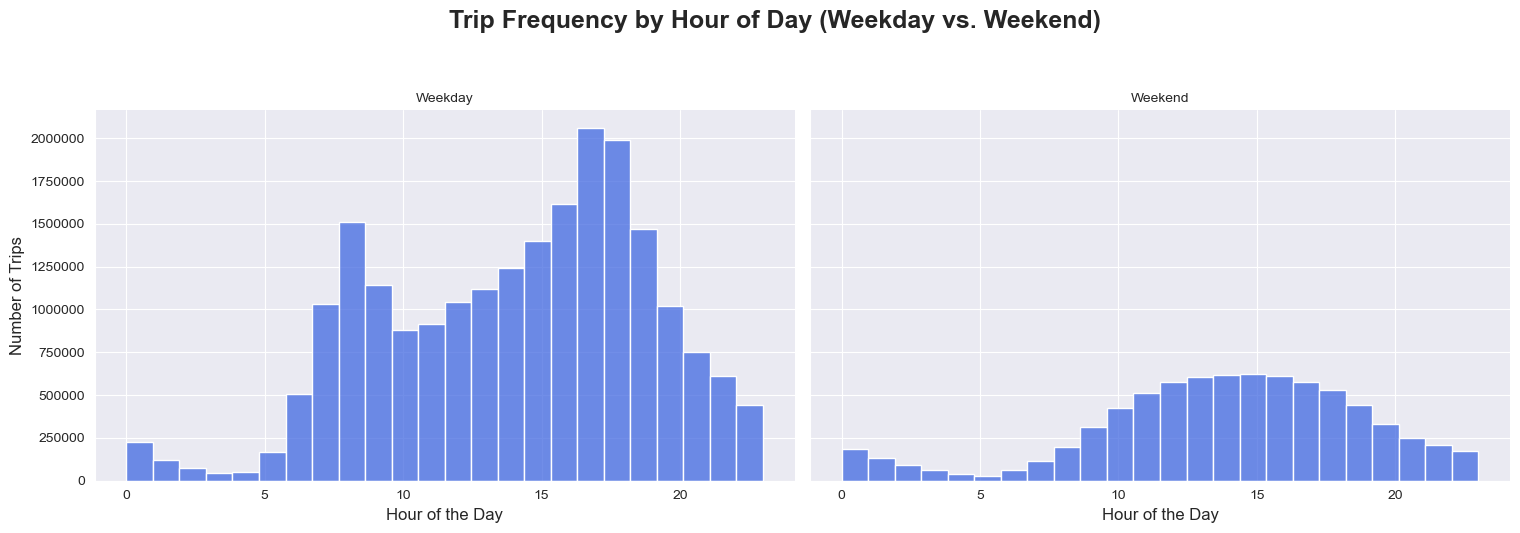

In [27]:
# Ensure 'trip_count' is numeric to avoid errors in weighting the histogram
df_subset["trip_count"] = pd.to_numeric(df_subset["trip_count"], errors="coerce")

# Set the visualization style for a clean and readable appearance
sns.set_style("darkgrid")

# Set up FacetGrid for weekday vs. weekend comparison
g = sns.FacetGrid(df_subset, col="day_type", height=5, aspect=1.5, sharex=True, sharey=True)

# Plot histogram using trip counts as weights
g.map_dataframe(sns.histplot, x="hour", bins=24, weights="trip_count", kde=False, color="royalblue")

# Adjust column titles (day_type) for clarity
g.set_titles(col_template="{col_name}")  # Removes "day_type = ..." formatting

# Adjust figure layout to prevent title overlap with column labels
plt.subplots_adjust(top=0.85)  # Moves title higher for better spacing

# Add a main title with improved positioning
g.fig.suptitle("Trip Frequency by Hour of Day (Weekday vs. Weekend)", fontsize=18, fontweight="bold", y=1.05)

# Loop through each subplot to set axis labels and adjust y-axis format
for ax in g.axes.flat:
    ax.set_xlabel("Hour of the Day", fontsize=12)  # X-axis represents time of day (0-23)
    ax.set_ylabel("Number of Trips", fontsize=12)  # Y-axis represents total trip volume
    ax.tick_params(axis='x', labelsize=10)  # Adjusts tick label size for better readability
    ax.tick_params(axis='y', labelsize=10)
    
    # ✅ Ensure full numbers are displayed instead of scientific notation
    ax.ticklabel_format(style='plain', axis='y')

# Define file path for saving the improved visualization
save_path = r"C:\Users\HP\Citi_Bike_Dashboard\04 Analysis\Visualizations\trip_frequency_by_hour_weekday_vs_weekend.png"

# Save the improved figure with high resolution
plt.savefig(save_path, dpi=300, bbox_inches="tight")

# Display the updated visualization
plt.show()

#### **Code Explanation**
1. **Overview**
    - This visualization presents the **distribution of bike trips** across different hours of the day, comparing **weekdays vs. weekends**. The histogram shows the total number of trips at each hour, helping to understand **when bike usage peaks** for each day type.
2. **FacetGrid for side-by-side comparison**
    - The `FacetGrid` creates **two separate histograms**, one for **weekdays** and another for **weekends**.
3. **Histogram with Weighted Trip Counts**
   - Instead of counting individual rides, the histogram **weights bars using `trip_count`**, ensuring actual trip volume is represented.
4. **Adjusted Formatting for Readability**
   - **Title Placement** → Moved higher to avoid overlap.
   - **Y-Axis Labels** → Formatted to show full numbers instead of scientific notation.
   - **Tick Labels & Font Size** → Increased for clarity.
---
**Key Insights**
- Weekday trips peak during commuting hours (8 AM & 5-7 PM).
- Weekend trips are more evenly spread, peaking in the late morning to afternoon.
- Bike usage is lower in the early morning (12 AM - 5 AM) on both weekdays and weekends.